In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import paleoscripts as ps

In [2]:
ds = xr.open_dataset("/nesi/nobackup/vuw03367/ka241/5001-5100/srnd_ka241.nc.gz")

In [3]:
# box size
lonmin, lonmax = 140, 155, # 130, 145 #140, 155
latmin, latmax = 0, 30

In [8]:
# regrid rnd to a higher resolution in box
rnd = ds.rnd.interp(longitude=np.linspace(lonmin, lonmax, 15),
                    latitude=np.linspace(latmin, latmax, 30))
# rnd = ds.rnd.sel(longitude=slice(lonmin, lonmax),
#                      latitude=slice(latmin, latmax))

In [9]:
rnd

<xarray.DataArray 'rnd' (year: 100, month: 12, latitude: 30, longitude: 15)>
array([[[[ 8.13721499,  8.52924451,  8.63898153, ...,  6.00572818,
           5.63885653,  5.27198488],
         [ 7.70013379,  7.99540299,  7.84595462, ...,  6.09985464,
           5.82160198,  5.54334933],
         [ 7.06260063,  7.26499564,  7.03459201, ...,  5.92661039,
           5.73390633,  5.54120226],
         ...,
         [ 4.9655754 ,  4.92705956,  4.73187003, ...,  4.1394706 ,
           4.16171947,  4.18396834],
         [ 5.24062557,  5.30639887,  5.18790185, ...,  4.97712943,
           4.99077906,  5.00442869],
         [ 5.51567574,  5.68573818,  5.64393367, ...,  5.81478826,
           5.81983865,  5.82488905]],

        [[ 3.51308004,  3.89440306,  4.26120271, ...,  5.97987297,
           5.76807159,  5.55627022],
         [ 2.69835599,  2.90570731,  3.25491793, ...,  7.51536424,
           7.36415608,  7.21294792],
         [ 2.21648277,  2.35574307,  2.80508104, ...,  8.48771242,
           8.35181681,  8.21592121],
...
         [ 6.12451041,  5.53565834,  5.15210818, ...,  2.72523582,
           2.82274163,  2.92024743],
         [ 6.54415653,  5.97753097,  5.48057326, ...,  2.83715246,
           2.87656382,  2.91597518],
         [ 6.96380265,  6.4194036 ,  5.80903835, ...,  2.9490691 ,
           2.93038602,  2.91170294]],

        [[ 5.19303636,  5.01431175,  4.66309247, ...,  2.84349218,
           2.62232511,  2.40115805],
         [ 3.53366371,  3.30301452,  3.12963488, ...,  3.10455065,
           2.92642977,  2.74830889],
         [ 2.49543922,  2.28015793,  2.25767321, ...,  3.54042512,
           3.44299795,  3.34557078],
         ...,
         [ 5.61944282,  5.71940238,  5.65794188, ...,  5.27717561,
           5.39973092,  5.52228623],
         [ 5.58041263,  5.7518164 ,  5.75903291, ...,  5.53640011,
           5.63858295,  5.7407658 ],
         [ 5.54138245,  5.78423043,  5.86012394, ...,  5.7956246 ,
           5.87743499,  5.95924537]]]])
Coordinates:
  * month      (month) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * year       (year) int32 5001 5002 5003 5004 5005 ... 5097 5098 5099 5100
  * longitude  (longitude) float64 140.0 141.1 142.1 143.2 ... 152.9 153.9 155.0
  * latitude   (latitude) float64 0.0 1.034 2.069 3.103 ... 27.93 28.97 30.0
Attributes:
    long_name:  precipitation
    units:      mm/day

In [31]:
# season average across all the years
rnd_djf = ps.extract_season(rnd, season='djf').mean(dim=['month', 'year'])
rnd_djf                                                   

<xarray.DataArray 'rnd' (latitude: 30, longitude: 15)>
array([[6.778883  , 6.87431679, 6.67895847, 6.48360016, 6.28824185,
        6.09288354, 5.88268984, 5.59831917, 5.3139485 , 5.02957783,
        4.74520716, 4.46083649, 4.28582217, 4.12074933, 3.95567649],
       [5.82848141, 5.87295464, 5.77472251, 5.67649038, 5.57825825,
        5.48002612, 5.40102652, 5.41818954, 5.43535256, 5.45251559,
        5.46967861, 5.48684163, 5.38180981, 5.26566937, 5.14952893],
       [5.27821478, 5.2881335 , 5.2774793 , 5.26682509, 5.25617088,
        5.24551667, 5.26699533, 5.44913833, 5.63128133, 5.81342432,
        5.99556732, 6.17771032, 6.13800825, 6.07813845, 6.01826866],
       [5.19722328, 5.19182838, 5.25755397, 5.32327956, 5.38900514,
        5.45473073, 5.54066437, 5.72763822, 5.91461207, 6.10158592,
        6.28855977, 6.47553362, 6.49570459, 6.50071167, 6.50571876],
       [5.11623179, 5.09552325, 5.23762864, 5.37973402, 5.52183941,
        5.6639448 , 5.8143334 , 6.00613811, 6.19794281, 6.38974752,
        6.58155222, 6.77335692, 6.85340094, 6.9232849 , 6.99316885],
       [5.19580502, 5.1288495 , 5.28397324, 5.43909698, 5.59422072,
        5.74934446, 5.90520129, 6.0647236 , 6.22424591, 6.38376822,
        6.54329053, 6.70281284, 6.80634322, 6.90478344, 7.00322366],
       [5.53656177, 5.37304136, 5.43811619, 5.50319101, 5.56826584,
        5.63334067, 5.6987146 , 5.76558404, 5.83245348, 5.89932293,
...
        5.76845283, 5.67229183, 5.4929845 , 5.31367716, 5.13436983,
        4.95506249, 4.77575516, 4.58900972, 4.4015881 , 4.21416647],
       [5.5575912 , 5.71440054, 5.70553238, 5.69666422, 5.68779605,
        5.67892789, 5.65156105, 5.53170085, 5.41184065, 5.29198045,
        5.17212025, 5.05226005, 4.90347576, 4.75206202, 4.60064827],
       [5.15029139, 5.33961121, 5.39629477, 5.45297833, 5.50966189,
        5.56634545, 5.60371096, 5.54448624, 5.48526152, 5.42603679,
        5.36681207, 5.30758735, 5.20019482, 5.08842341, 4.97665199],
       [4.74299158, 4.96482188, 5.08705716, 5.20929245, 5.33152773,
        5.45376301, 5.55586087, 5.55727163, 5.55868238, 5.56009314,
        5.56150389, 5.56291464, 5.49691388, 5.42478479, 5.35265571],
       [4.53035385, 4.74484972, 4.86820429, 4.99155886, 5.11491342,
        5.23826799, 5.35018712, 5.40492906, 5.459671  , 5.51441294,
        5.56915488, 5.62389682, 5.59678784, 5.56223787, 5.5276879 ],
       [4.35926067, 4.55791846, 4.66864121, 4.77936397, 4.89008673,
        5.00080948, 5.11083083, 5.21734508, 5.32385934, 5.43037359,
        5.53688785, 5.6434021 , 5.65465137, 5.65724018, 5.65982899],
       [4.18816749, 4.37098719, 4.46907814, 4.56716908, 4.66526003,
        4.76335098, 4.87147453, 5.0297611 , 5.18804767, 5.34633424,
        5.50462081, 5.66290738, 5.71251489, 5.75224248, 5.79197008]])
Coordinates:
  * longitude  (longitude) float64 140.0 141.1 142.1 143.2 ... 152.9 153.9 155.0
  * latitude   (latitude) float64 0.0 1.034 2.069 3.103 ... 27.93 28.97 30.0

In [32]:
# find the lon/lat points where the field is max
xy = ps.find_points_where_field_is_extreme(rnd_djf, extremum='max')

In [39]:
# compute the line that goes across the points
fit = ps.linear_regression_coeffs(xy) #, cooks_tol=4)

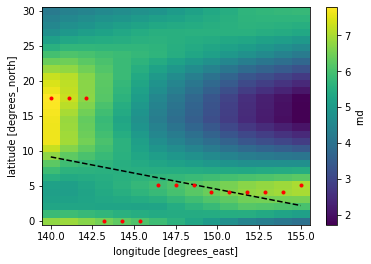

In [40]:
rnd_djf.plot()
xs = np.array([lonmin, lonmax])
ys = fit.intercept + fit.slope * xs
plt.plot(xs, ys, 'k--')
plt.plot(xy[:,0], xy[:, 1], 'r.')
plt.show()

In [41]:
ps.linear_regression_coeffs??

Signature: ps.linear_regression_coeffs(xy_pts: numpy.ndarray, cooks_tol: float = 4)
Source:   
def linear_regression_coeffs(xy_pts: np.ndarray,
                             cooks_tol: float=4): 
    """
    Find the linear regression coefficients after removing outliers
    :param xy_pts: 2d array of [(x,y), ..] points
    :param cooks_tol: Cook's distance tolerance, points that are cooks_tol/n distance 
                      away will be removed. A good value is about 4.
    """

    x, y = xy_pts[:, 0], xy_pts[:, 1]

    # add constant to predictor variables
    x = sm.add_constant(x)

    # fit linear regression model
    model = sm.OLS(y, x).fit()

    # create instance of influence
    influence = model.get_influence()

    # obtain Cook's distance for each observation
    cooks = influence.cooks_distance[0]

    # remove the outliers 
    msk = (cooks > cooks_tol/len(x))
    xy_pts_filtered = xy_pts[~msk, :]

    # recompute the linear regressioon coefficients without the outlier